**Project Check-in 1**
1. We chose the Spotify Prediction dataset.
2. We are studying how different aspects of tracks such as loudness, instrumentalness, tempo, and genre individually predict popularity, and how they combine to predict popularity.
3. See below.
4. See below.

In [ ]:
%pip install scikit-lego
%pip install seaborn
%pip install nbstripout
%nbstripout --install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv("./dataset.csv")

In [2]:
print(df.columns)
print("*************************************")
print(df.head(10))
print("*************************************")
print(df.tail(10))
print("*************************************")
print(df.describe())
print("*************************************")
print(df.info())
print(df.shape)


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
*************************************
   Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera 

In [3]:
for col in df.columns:
    print(col, ": ", df[col].nunique())

# # unique track_ids should be equal to the number of tracks, but it isn't
# Seems like some track_ids show up multiple times with different track_genres (possibly some of the other features are different as well, but that hasn't been confirmed yet)
# Seems like 1 track_genre disappears when the duplicates of the track_ids are removed

Unnamed: 0 :  114000
track_id :  89741
artists :  31437
album_name :  46589
track_name :  73608
popularity :  101
duration_ms :  50697
explicit :  2
danceability :  1174
energy :  2083
key :  12
loudness :  19480
mode :  2
speechiness :  1489
acousticness :  5061
instrumentalness :  5346
liveness :  1722
valence :  1790
tempo :  45653
time_signature :  5
track_genre :  114


In [4]:
# Drop all duplicates (need to remove the first column because these are just indices)
revised_df = df.drop(columns='Unnamed: 0').drop_duplicates(subset=['track_id','album_name','artists','track_name'])

# Double check that everything lines up
for col in revised_df.columns:
    print(col, ": ", revised_df[col].nunique(), "; Type: ", revised_df[col].dtypes)
print(revised_df.shape)

track_id :  89741 ; Type:  object
artists :  31437 ; Type:  object
album_name :  46589 ; Type:  object
track_name :  73608 ; Type:  object
popularity :  101 ; Type:  int64
duration_ms :  50697 ; Type:  int64
explicit :  2 ; Type:  bool
danceability :  1174 ; Type:  float64
energy :  2083 ; Type:  float64
key :  12 ; Type:  int64
loudness :  19480 ; Type:  float64
mode :  2 ; Type:  int64
speechiness :  1489 ; Type:  float64
acousticness :  5061 ; Type:  float64
instrumentalness :  5346 ; Type:  float64
liveness :  1722 ; Type:  float64
valence :  1790 ; Type:  float64
tempo :  45653 ; Type:  float64
time_signature :  5 ; Type:  int64
track_genre :  113 ; Type:  object
(89741, 20)


In [5]:
# Check for NaN values in revised dataframe
revised_df[revised_df.isna().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [6]:
# Drop NaN values
# NEED TO FIGURE OUT WHETHER THIS IS WORTH IT BC ONLY ARTISTS/ALBUM_NAME/TRACK_NAME ARE NAN

revised_df.dropna(axis=0,inplace=True)
revised_df.shape

(89740, 20)

In [7]:

revised_df.drop(columns=['track_id', 'artists', 'album_name', 'track_name'], inplace=True)
columns = revised_df.columns
le = LabelEncoder()
revised_df['track_genre'] = le.fit_transform(revised_df['track_genre'])

scaler = StandardScaler()
revised_df = scaler.fit_transform(revised_df)
revised_df = pd.DataFrame(revised_df, columns=columns)

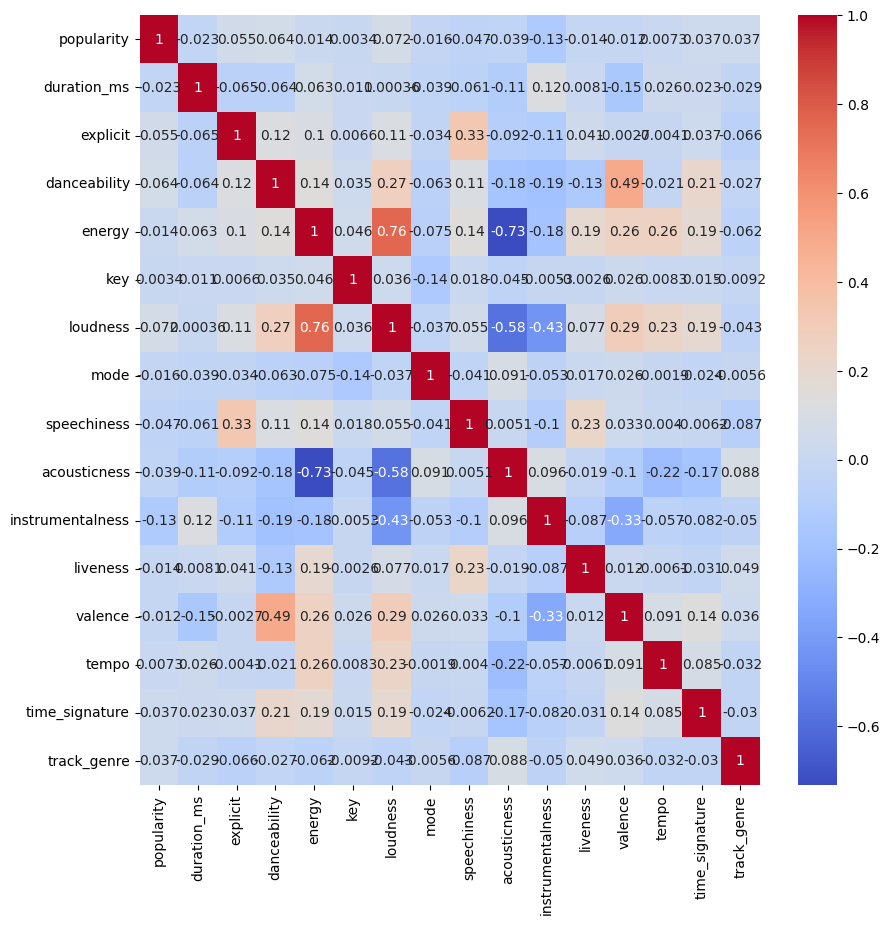

In [8]:
# Look at linear correlations between features
corr_matrix = revised_df.corr(method='pearson')
plt.figure(figsize=(10 , 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


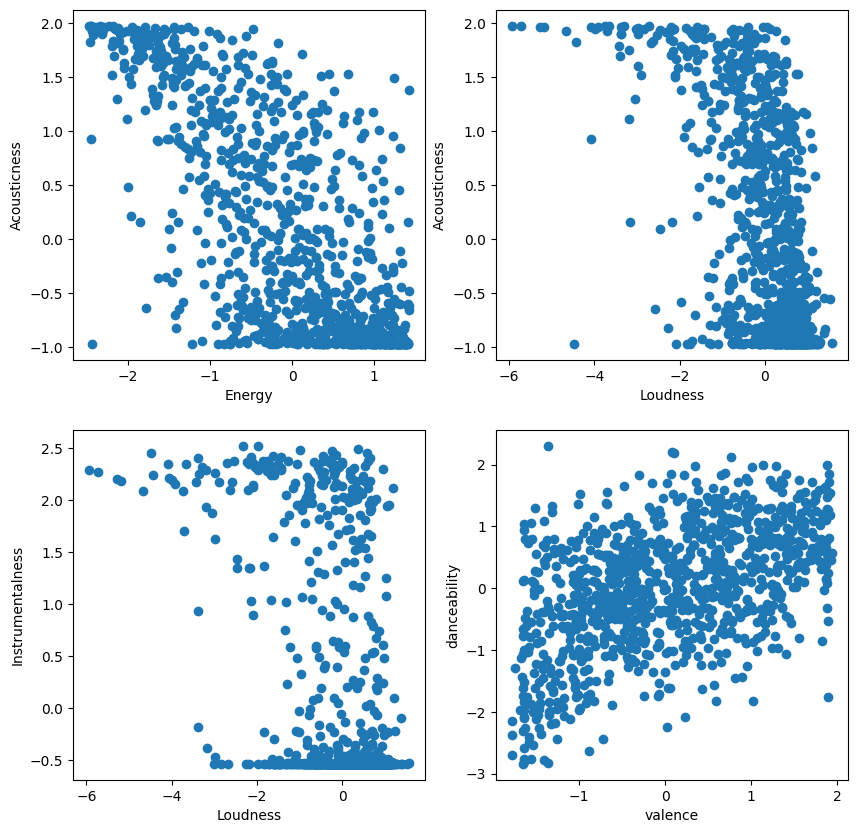

In [9]:
sample = revised_df.sample(n=1000, random_state=42)

fig,ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].scatter(sample['energy'], sample['acousticness'])
ax[0,0].set_xlabel('Energy')
ax[0,0].set_ylabel('Acousticness')

ax[0,1].scatter(sample['loudness'], sample['acousticness'])
ax[0,1].set_xlabel('Loudness')
ax[0,1].set_ylabel('Acousticness')

ax[1,0].scatter(sample['loudness'], sample['instrumentalness'])
ax[1,0].set_xlabel('Loudness')
ax[1,0].set_ylabel('Instrumentalness')

ax[1,1].scatter(sample['valence'], sample['danceability'])
ax[1,1].set_xlabel('valence')
ax[1,1].set_ylabel('danceability')
plt.show()

Text(0, 0.5, 'Popularity')

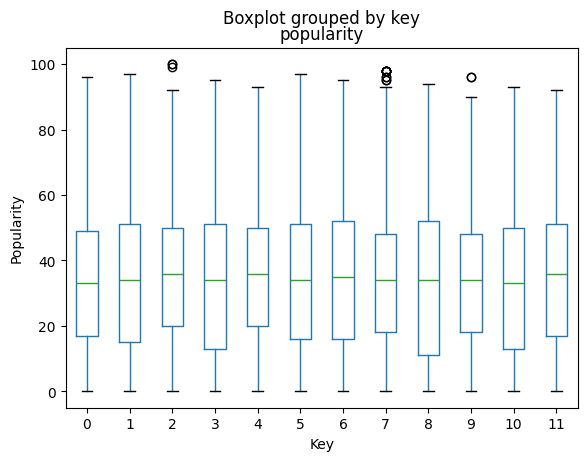

In [10]:
df.boxplot(column='popularity', by='key', grid=False)
plt.xlabel('Key')
plt.ylabel('Popularity')